# Batch Size Experiments

### Experiment with various batch sizes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define gradient descent function
def gradient_descent(X, y, learning_rate=0.01, n_iterations=100, batch_size=None):
    m = len(X)
    theta = np.random.randn(2, 1)  # random initialization
    history = []

    for iteration in range(n_iterations):
        if batch_size is None:
            gradients = 2/m * X.T.dot(X.dot(theta) - y)
        else:
            indices = np.random.choice(m, batch_size)
            X_batch = X[indices]
            y_batch = y[indices]
            gradients = 2/batch_size * X_batch.T.dot(X_batch.dot(theta) - y_batch)
        
        theta = theta - learning_rate * gradients
        cost = np.mean((X.dot(theta) - y) ** 2)
        history.append(cost)

    return theta, history

# Define function to plot convergence
def plot_convergence(history, title):
    plt.plot(history)
    plt.title(title)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()

In [3]:
# Generate synthetic data for linear regression
np.random.seed(42)
samples = 1000
X = 2 * np.random.rand(samples, 1)
y = 4 + 3 * X + np.random.randn(samples, 1)

# Add bias term to feature matrix X
X_b = np.c_[np.ones((samples, 1)), X]

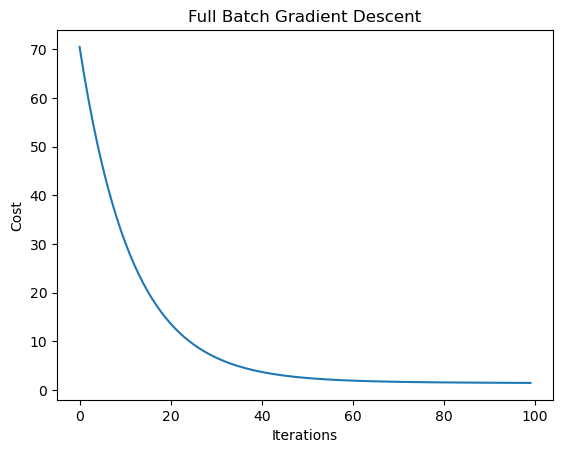

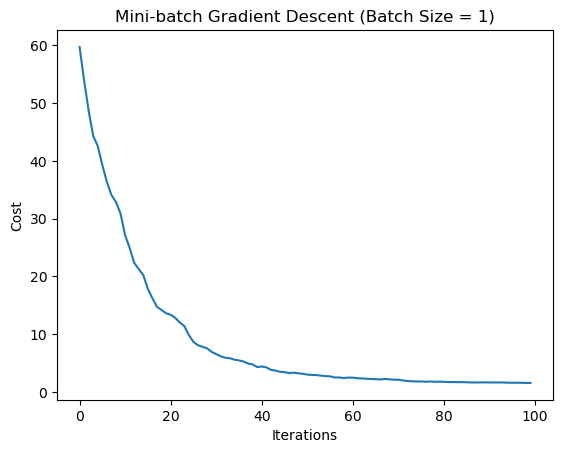

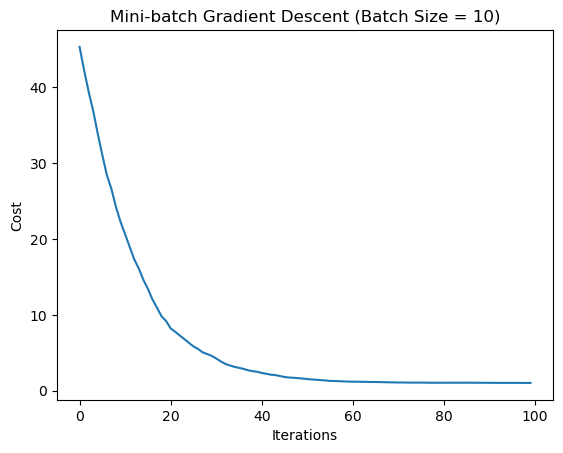

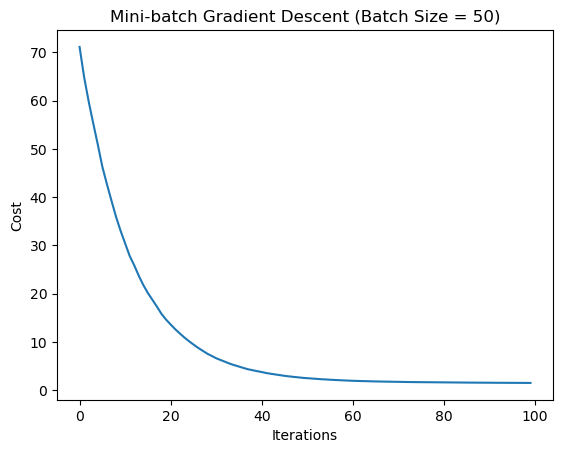

In [4]:
# Perform gradient descent with different batch sizes
batch_sizes = [None, 1, 10, 50]  # None means full batch gradient descent

for batch_size in batch_sizes:
    theta, history = gradient_descent(X_b, y, batch_size=batch_size)
    if batch_size is None:
        title = "Full Batch Gradient Descent"
    else:
        title = f"Mini-batch Gradient Descent (Batch Size = {batch_size})"
    plot_convergence(history, title)
